### 1. Loading the Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
student_course_data = pd.read_csv('../Data/student_course_3000.csv')

In [ ]:
print(student_course_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             3010 non-null   int64  
 1   course_id              3010 non-null   object 
 2   similarity_score       3010 non-null   float64
 3   Branch                 3010 non-null   object 
 4   Percentage_10th        3010 non-null   int64  
 5   Percentage_12th        3010 non-null   int64  
 6   Skills_x               1960 non-null   object 
 7   Career_Goal            3010 non-null   object 
 8   StudentId              3010 non-null   int64  
 9   skills_processed_x     1960 non-null   object 
 10  career_goal_processed  3010 non-null   object 
 11  Title                  3010 non-null   object 
 12  Category               3010 non-null   object 
 13  Course Type            3010 non-null   object 
 14  Skills_y               3010 non-null   object 
 15  skil

In [ ]:
print("Student Course Data:")
display(student_course_data.head())

Student Course Data:


,student_id,course_id,similarity_score,Branch,Percentage_10th,Percentage_12th,Skills_x,Career_Goal,StudentId,skills_processed_x,career_goal_processed,Title,Category,Course Type,Skills_y,skills_processed_y,category_processed
0,83,google_data_analytics_capstone_complete_a_case...,0.198736,MCA,75,65,"HTML, CSS, JavaScript, React, Node.js, Angular...",Web Developer,83,html css javascript react nodejs angular apis ...,web developer,Google Data Analytics Capstone: Complete a Cas...,Data Science,Course,"Job portfolio,Data Cleansing,Data Analysis,Dat...",job portfoliodata cleansingdata analysisdata v...,data science
1,17,1mindfulness_in_integrative_healthcare,0.198479,CSIT,85,75,"HTML, CSS, JavaScript, React, Node.js, Angular...",Web Developer,17,html css javascript react nodejs angular apis ...,web developer,Mindfulness in Integrative Healthcare,Health,Course,"wellbeing,improved symptom management,whole-pe...",wellbeingimproved symptom managementwholeperso...,health
2,83,web_design_for_everybody_basics_of_web_develop...,0.411329,MCA,75,65,"HTML, CSS, JavaScript, React, Node.js, Angular...",Web Developer,83,html css javascript react nodejs angular apis ...,web developer,Web Design for Everybody: Basics of Web Develo...,Computer Science,Specialization,"Web Development, Cascading Style Sheets (CSS),...",web development cascading style sheets css htm...,computer science
3,2,ethical_issues_in_data_science,0.613531,CSIT,85,95,"Python, R, Data Analysis, Machine Learning, SQ...",Data Scientist,2,python r data analysis machine learning sql da...,data scientist,Ethical Issues in Data Science,Data Science,Course,"Data Science,Ethics,Algorithms,Privacy,Philoso...",data scienceethicsalgorithmsprivacyphilosophy,data science
4,40,introduction_to_programming_with_python_and_ja...,0.219441,CSME,85,75,"Automation Systems, PLC Programming, Control S...",Automation Engineer,40,automation systems plc programming control sys...,automation engineer,Introduction to Programming with Python and Ja...,Computer Science,Specialization,"Programming Principles, Python Programming, Ja...",programming principles python programming java...,computer science


#### Preprocessing

In [ ]:
student_course_data.columns

Index(['student_id', 'course_id', 'similarity_score', 'Branch',
       'Percentage_10th', 'Percentage_12th', 'Skills_x', 'Career_Goal',
       'StudentId', 'skills_processed_x', 'career_goal_processed', 'Title',
       'Category', 'Course Type', 'Skills_y', 'skills_processed_y',
       'category_processed'],
      dtype='object')

In [ ]:
student_course_data.drop(['student_id', 'course_id', 'similarity_score', 'skills_processed_x', 'Skills_x', 'Career_Goal', 'Skills_y', 'StudentId', 'category_processed'], axis=1, inplace=True)

In [ ]:
student_course_data['Skills'] = student_course_data['skills_processed_y']
student_course_data.drop(['skills_processed_y'], axis=1, inplace=True)

student_course_data['Career_Goal'] = student_course_data['career_goal_processed']
student_course_data.drop(['career_goal_processed'], axis=1, inplace=True)

In [ ]:
student_course_data.columns

Index(['Branch', 'Percentage_10th', 'Percentage_12th', 'Title', 'Category',
       'Course Type', 'Skills', 'Career_Goal'],
      dtype='object')

In [ ]:
student_course_data = student_course_data[['Branch', 'Percentage_10th', 'Percentage_12th', 'Career_Goal',  'Course Type', 'Skills', 'Category', 'Title']]

In [ ]:
student_course_data.isnull().sum()

Branch             0
Percentage_10th    0
Percentage_12th    0
Career_Goal        0
Course Type        0
Skills             0
Category           0
Title              0
dtype: int64

In [ ]:
student_course_data.dropna(inplace=True)

In [ ]:
student_course_data.head()

,Branch,Percentage_10th,Percentage_12th,Career_Goal,Course Type,Skills,Category,Title
0,MCA,75,65,web developer,Course,job portfoliodata cleansingdata analysisdata v...,Data Science,Google Data Analytics Capstone: Complete a Cas...
1,CSIT,85,75,web developer,Course,wellbeingimproved symptom managementwholeperso...,Health,Mindfulness in Integrative Healthcare
2,MCA,75,65,web developer,Specialization,web development cascading style sheets css htm...,Computer Science,Web Design for Everybody: Basics of Web Develo...
3,CSIT,85,95,data scientist,Course,data scienceethicsalgorithmsprivacyphilosophy,Data Science,Ethical Issues in Data Science
4,CSME,85,75,automation engineer,Specialization,programming principles python programming java...,Computer Science,Introduction to Programming with Python and Ja...


In [ ]:
student_course_data.to_csv('../Data/final_student_course.csv', index=False)

### 2. Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Data/final_student_course.csv')

In [3]:
data.head()

,Branch,Percentage_10th,Percentage_12th,Career_Goal,Course Type,Skills,Category,Title
0,MCA,75,65,web developer,Course,job portfoliodata cleansingdata analysisdata v...,Data Science,Google Data Analytics Capstone: Complete a Cas...
1,CSIT,85,75,web developer,Course,wellbeingimproved symptom managementwholeperso...,Health,Mindfulness in Integrative Healthcare
2,MCA,75,65,web developer,Specialization,web development cascading style sheets css htm...,Computer Science,Web Design for Everybody: Basics of Web Develo...
3,CSIT,85,95,data scientist,Course,data scienceethicsalgorithmsprivacyphilosophy,Data Science,Ethical Issues in Data Science
4,CSME,85,75,automation engineer,Specialization,programming principles python programming java...,Computer Science,Introduction to Programming with Python and Ja...


In [4]:
data = pd.read_csv('../Data/final_student_course.csv')

data = data.drop(['Title', 'Career_Goal'], axis=1)

df = pd.DataFrame(data)
print("Original Dataset:")
print(df.head())
print("\nBasic Information:")
print(df.dtypes)


Original Dataset:
  Branch  Percentage_10th  Percentage_12th     Course Type  \
0    MCA               75               65          Course   
1   CSIT               85               75          Course   
2    MCA               75               65  Specialization   
3   CSIT               85               95          Course   
4   CSME               85               75  Specialization   

                                              Skills          Category  
0  job portfoliodata cleansingdata analysisdata v...      Data Science  
1  wellbeingimproved symptom managementwholeperso...            Health  
2  web development cascading style sheets css htm...  Computer Science  
3      data scienceethicsalgorithmsprivacyphilosophy      Data Science  
4  programming principles python programming java...  Computer Science  

Basic Information:
Branch             object
Percentage_10th     int64
Percentage_12th     int64
Course Type        object
Skills             object
Category           ob

#### Check for missing values


In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Branch             0
Percentage_10th    0
Percentage_12th    0
Course Type        0
Skills             0
Category           0
dtype: int64


In [6]:
data.head()

,Branch,Percentage_10th,Percentage_12th,Course Type,Skills,Category
0,MCA,75,65,Course,job portfoliodata cleansingdata analysisdata v...,Data Science
1,CSIT,85,75,Course,wellbeingimproved symptom managementwholeperso...,Health
2,MCA,75,65,Specialization,web development cascading style sheets css htm...,Computer Science
3,CSIT,85,95,Course,data scienceethicsalgorithmsprivacyphilosophy,Data Science
4,CSME,85,75,Specialization,programming principles python programming java...,Computer Science


In [7]:
data['Category'].unique()
data['Category'].value_counts()

Category
Data Science                        1242
Computer Science                     636
Business                             472
Information Technology               234
Health                               113
Physical Science and Engineering      99
Language Learning                     66
Arts and Humanities                   52
Social Sciences                       49
Personal Development                  37
Math and Logic                         5
Negócios                               2
Ciencias de la Computación             1
Tecnologia da informação               1
Ciencia de Datos                       1
Name: count, dtype: int64

In [8]:
data = data['Category'].value_counts().nlargest(5).index

#### Feature 1: Skills count - number of skills mentioned


In [9]:
df['Skills_Count'] = df['Skills'].apply(lambda x: len(x.split(' ')))
print("\nNew Feature 2 - Skills count:")
print(df[['Skills', 'Skills_Count']].head())



New Feature 2 - Skills count:
                                              Skills  Skills_Count
0  job portfoliodata cleansingdata analysisdata v...             7
1  wellbeingimproved symptom managementwholeperso...             5
2  web development cascading style sheets css htm...            25
3      data scienceethicsalgorithmsprivacyphilosophy             2
4  programming principles python programming java...            27


#### Feature 2: Academic Performance Score - weighted average of 10th and 12th percentages


In [10]:
df['Performance_Gap'] = df['Percentage_12th'] - df['Percentage_10th']
print("\nNew Feature 5 - Performance Gap:")
print(df[['Percentage_10th', 'Percentage_12th', 'Performance_Gap']].head())


New Feature 5 - Performance Gap:
   Percentage_10th  Percentage_12th  Performance_Gap
0               75               65              -10
1               85               75              -10
2               75               65              -10
3               85               95               10
4               85               75              -10


#### Feature 3: Performance Gap - difference between 12th and 10th percentages

In [11]:
df['Performance_Gap'] = df['Percentage_12th'] - df['Percentage_10th']
print("\nNew Feature 5 - Performance Gap:")
print(df[['Percentage_10th', 'Percentage_12th', 'Performance_Gap']].head())


New Feature 5 - Performance Gap:
   Percentage_10th  Percentage_12th  Performance_Gap
0               75               65              -10
1               85               75              -10
2               75               65              -10
3               85               95               10
4               85               75              -10


#### Encoding data using Label Encoding

In [12]:
label_encoder = LabelEncoder()
df['Course_Type_Encoded'] = label_encoder.fit_transform(df['Course Type'])

categorical_cols = ['Branch', 'Course Type', 'Category']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_Encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le 

# Drop original categorical columns
df.drop(columns=categorical_cols, inplace=True)

# Display transformed dataset
print(df.head())

   Percentage_10th  Percentage_12th  \
0               75               65   
1               85               75   
2               75               65   
3               85               95   
4               85               75   

                                              Skills  Skills_Count  \
0  job portfoliodata cleansingdata analysisdata v...             7   
1  wellbeingimproved symptom managementwholeperso...             5   
2  web development cascading style sheets css htm...            25   
3      data scienceethicsalgorithmsprivacyphilosophy             2   
4  programming principles python programming java...            27   

   Performance_Gap  Course_Type_Encoded  Branch_Encoded  Course Type_Encoded  \
0              -10                    0               7                    0   
1              -10                    0               2                    0   
2              -10                    3               7                    3   
3               10      

In [13]:
df_encoded = df.copy()

In [14]:
df_encoded.head()

,Percentage_10th,Percentage_12th,Skills,Skills_Count,Performance_Gap,Course_Type_Encoded,Branch_Encoded,Course Type_Encoded,Category_Encoded
0,75,65,job portfoliodata cleansingdata analysisdata v...,7,-10,0,7,0,5
1,85,75,wellbeingimproved symptom managementwholeperso...,5,-10,0,2,0,6
2,75,65,web development cascading style sheets css htm...,25,-10,3,7,3,4
3,85,95,data scienceethicsalgorithmsprivacyphilosophy,2,10,0,2,0,5
4,85,75,programming principles python programming java...,27,-10,3,3,3,4


#### Vectorizing Skills feature for model training

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

Skills_tfidf = tfidf.fit_transform(df_encoded['Skills']).toarray()

tfidf_df = pd.DataFrame(Skills_tfidf, columns=tfidf.get_feature_names_out())

df_encoded = pd.concat([df.reset_index(drop=True), tfidf_df], axis=1)
df_encoded.drop(columns=['Skills'], inplace=True)


In [17]:
df_encoded.head()

,Percentage_10th,Percentage_12th,Skills_Count,Performance_Gap,Course_Type_Encoded,Branch_Encoded,Course Type_Encoded,Category_Encoded,ab,abatement,...,wireless,work,workflow,workload,workloads,world,write,writing,writingcommunicationwriting,xml
0,75,65,7,-10,0,7,0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85,75,5,-10,0,2,0,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75,65,25,-10,3,7,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85,95,2,10,0,2,0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,85,75,27,-10,3,3,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Independent and Depndent variable split

In [18]:
X = df_encoded.drop(columns=['Category_Encoded'])
X.head()
X.shape

(3010, 1007)

In [19]:
y = df_encoded['Course_Type_Encoded']
y.head()
y.shape

(3010,)

#### Feature importance extracter

#### 1. Random Forest Selector

In [20]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X, y)
top_rf = pd.DataFrame({
'Feature': X.columns,
'Importance': rf_selector.feature_importances_
})

top_rf = top_rf.sort_values(by='Importance', ascending=False).head(10)

#### 2. Mutual Info Classifier

In [21]:
mi_scores = mutual_info_classif(X, y, random_state=42)
feature_importance_mi = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
})

feature_importance_mi = feature_importance_mi.sort_values(by='MI_Score', ascending=False).head(10)

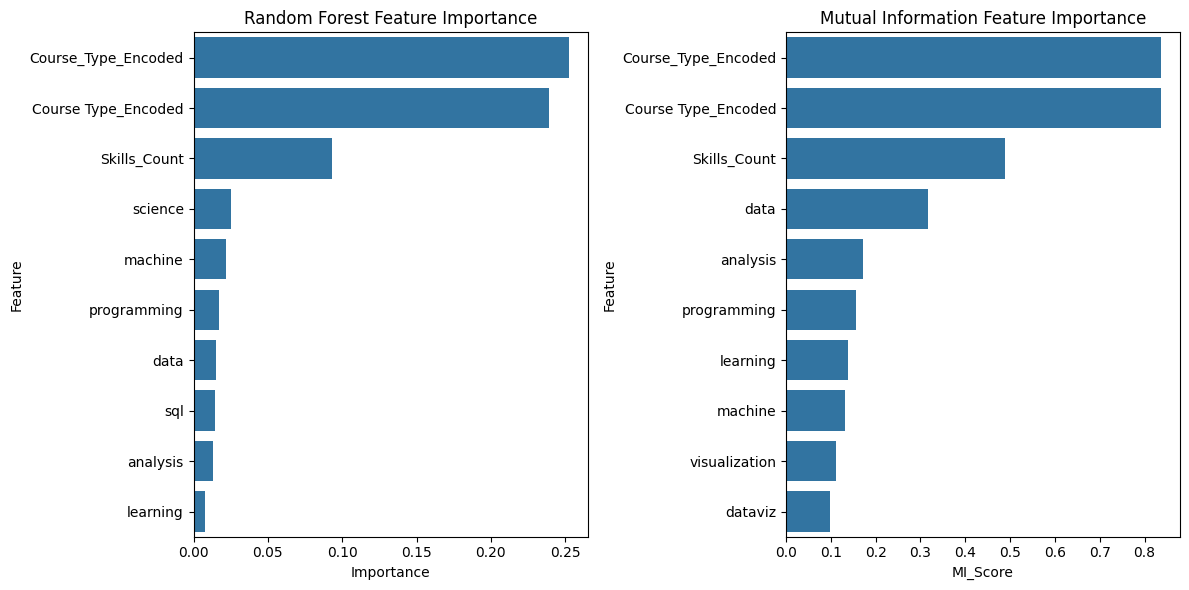

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=top_rf)
plt.title('Random Forest Feature Importance')

plt.subplot(1, 2, 2)
sns.barplot(x='MI_Score', y='Feature', data=feature_importance_mi)
plt.title('Mutual Information Feature Importance')

plt.tight_layout()
plt.show()

#### Combining the best features from both the methodologies

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

top_rf['Importance_Norm'] = scaler.fit_transform(top_rf[['Importance']])
feature_importance_mi['MI_Score_Norm'] = scaler.fit_transform(feature_importance_mi[['MI_Score']])

combined_features = pd.merge(top_rf, feature_importance_mi, on='Feature', how='inner')

combined_features['Combined_Score'] = (combined_features['Importance_Norm'] + combined_features['MI_Score_Norm']) / 2

combined_features = combined_features.sort_values(by='Combined_Score', ascending=False)


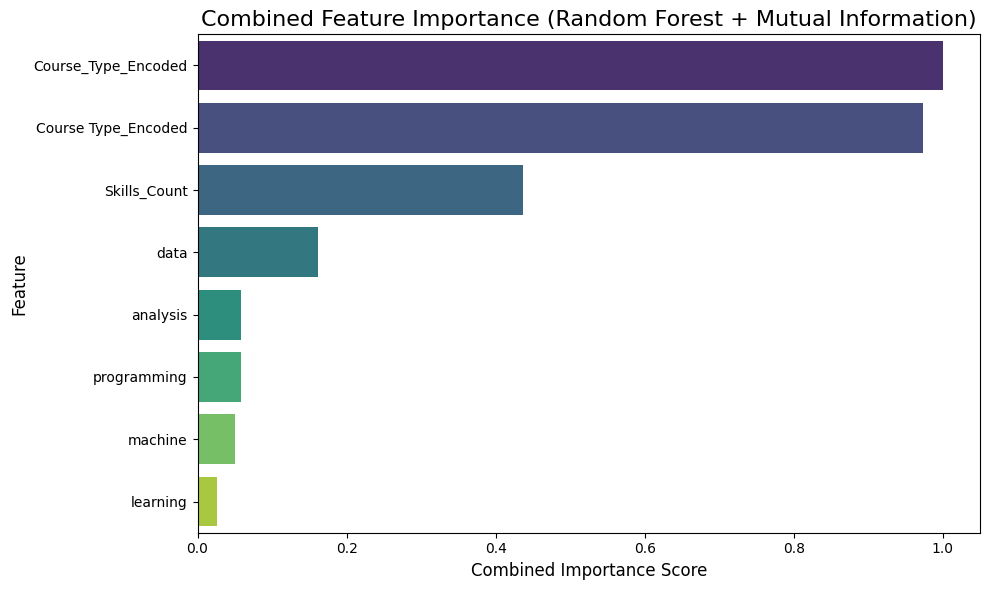

In [24]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Combined_Score', y='Feature', data=combined_features, palette='viridis')

plt.title('Combined Feature Importance (Random Forest + Mutual Information)', fontsize=16)
plt.xlabel('Combined Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.show()

#### Dimensionality Redution using PCA and Best features selection

In [25]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X)

print("PCA Applied: Number of Components =", pca.n_components_)

PCA Applied: Number of Components = 3


In [26]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_pca, y)

selected_component_indices = selector.get_support(indices=True)
print("Selected PCA Components:", selected_component_indices)

Selected PCA Components: [0 1 2]


#### Train and Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.15, random_state=42, stratify=y)

#### Class balancing using SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


#### Models declaration

In [29]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, kernel='rbf', random_state=42)
    }

#### Model training and Evaluation

                    Model  Accuracy  Precision    Recall  F1 Score  \
1           Decision Tree  0.931416   0.940547  0.931416  0.935471   
2           Random Forest  0.931416   0.934460  0.931416  0.932832   
3  Support Vector Machine  0.559735   0.879121  0.559735  0.662692   
0     Logistic Regression  0.389381   0.823646  0.389381  0.511455   

   CV Accuracy   ROC AUC  
1     1.000000  0.875814  
2     0.998671  0.940187  
3     0.902326  0.812383  
0     0.997342  0.798528  


<Figure size 1200x600 with 0 Axes>

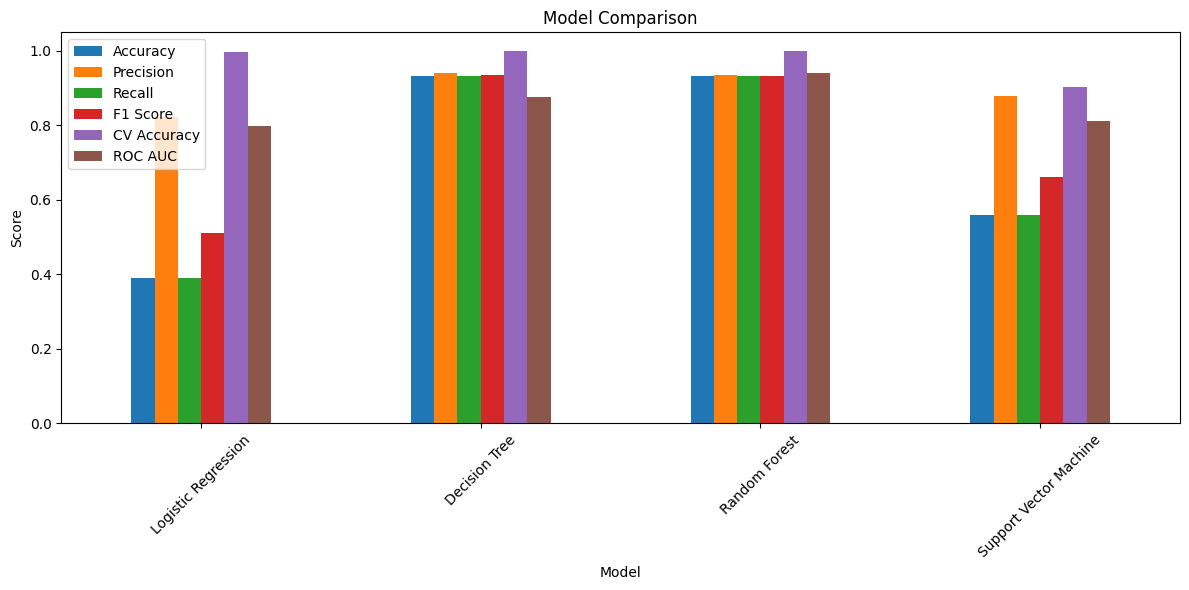

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Add cross-validation to the evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)  # To get probability predictions for ROC & AUC
    
    # Cross-validation (5-fold)
    cv_scores = cross_val_score(model, X, y, cv=2)  # Reduced folds for tiny dataset
    
    # Initialize the dictionary to store results
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'cv_accuracy': np.mean(cv_scores),
    }
    
    # Check if y_test is one-hot encoded or label encoded
    if len(y_test.shape) == 2:  # One-hot encoded
        num_classes = y_test.shape[1]
    else:  # Label encoded (single column)
        num_classes = len(np.unique(y_test))
        y_test_bin = np.zeros((len(y_test), num_classes))
        for i, label in enumerate(y_test):
            y_test_bin[i, label] = 1
        y_test = y_test_bin  # Convert to one-hot encoding

    # For multi-class, calculate ROC and AUC for each class (One-vs-Rest)
    roc_auc = []
    for i in range(num_classes):
        # Compute ROC curve and AUC for class i
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        auc = roc_auc_score(y_test[:, i], y_pred_proba[:, i])
        roc_auc.append(auc)

    metrics['roc_auc'] = np.mean(roc_auc)  # Average AUC for all classes

    return metrics

# Regenerate results with cross-validation
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)

# Display updated comparison
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1 Score': [results[model]['f1'] for model in results],
    'CV Accuracy': [results[model]['cv_accuracy'] for model in results],
    'ROC AUC': [results[model]['roc_auc'] for model in results]
})

print(comparison_df.sort_values('F1 Score', ascending=False))

# Plotting the comparison
plt.figure(figsize=(12, 6))
comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Confusion Matrix and Classification Report for the best model
best_model_name = comparison_df.loc[comparison_df['F1 Score'].idxmax(), 'Model']
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)


#### Confusion Matrix

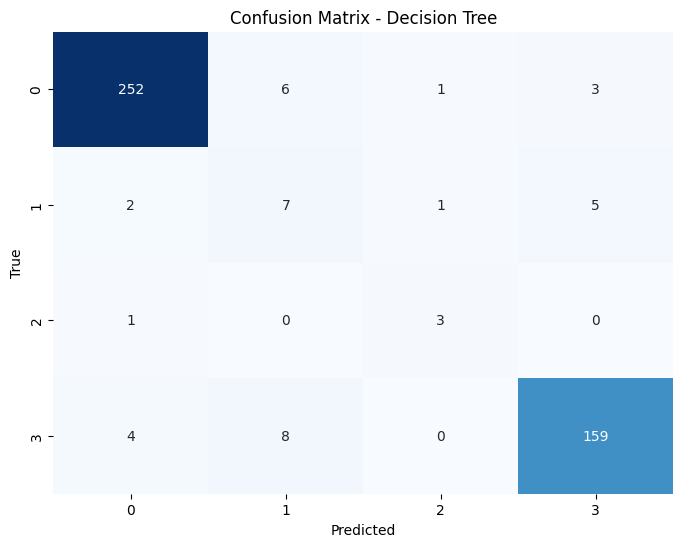

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### ROC Curve and AUC

Class 0 - AUC: 0.96
Class 1 - AUC: 0.72
Class 2 - AUC: 0.87
Class 3 - AUC: 0.95


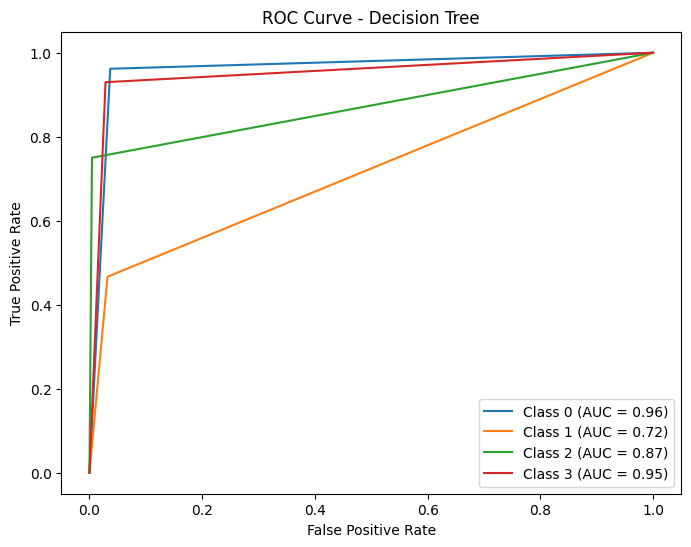

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_test_encoded = encoder.fit_transform(y_test.to_numpy().reshape(-1, 1))

y_pred_proba = best_model.predict_proba(X_test)

num_classes = y_test_encoded.shape[1]

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_encoded[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_encoded[:, i], y_pred_proba[:, i])
    print(f'Class {i} - AUC: {auc:.2f}')
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.title(f'ROC Curve - {best_model_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


In [33]:
import joblib
joblib.dump(best_model, '../Models/best_model.pkl')

['../Models/best_model.pkl']

In [34]:
sc_data = pd.read_csv('../Data/final_student_course.csv')

In [35]:
category_title = sc_data['Category'].unique()

In [36]:
job_data = pd.read_csv('../Data/final_job_data.csv')


In [37]:
job_title = job_data['Job Title'].unique()

#### Using Cosine similarity and TFIDF to match similar jobs

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Combine both lists into one for vectorization
all_text = np.concatenate((category_title, job_title))

# Use TF-IDF vectorizer to convert text into feature vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_text)

# Compute cosine similarity between category_title and job titles
similarity_matrix = cosine_similarity(tfidf_matrix[:len(category_title)], tfidf_matrix[len(category_title):])

# Convert to DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, index=category_title, columns=job_title)

# Find top matches for each category
top_matches = {}
for category in category_title:
    top_jobs = similarity_df.loc[category].nlargest(4)  # Get top 3 matching jobs
    top_matches[category] = list(top_jobs.index)

# store the value in a dictionary
category_job_mapping = {}
for category, jobs in top_matches.items():
    category_job_mapping[category] = jobs
    print(f"Top job matches for '{category}': {', '.join(jobs)}")


Top job matches for 'Data Science': Data Science Engineer, Data Science Manager, Data Analyst, Data Engineer
Top job matches for 'Health': Software Engineer, Data Engineer, Business Analyst, Developer
Top job matches for 'Computer Science': Data Science Engineer, Data Science Manager, Software Engineer, Data Engineer
Top job matches for 'Information Technology': Software Engineer, Data Engineer, Business Analyst, Developer
Top job matches for 'Business': Business Analyst, Business Consultant, Business Intelligence Analyst, Business System Analyst
Top job matches for 'Personal Development': Software Development Engineer, Software Engineer, Data Engineer, Business Analyst
Top job matches for 'Arts and Humanities': Software Engineer, Data Engineer, Business Analyst, Developer
Top job matches for 'Language Learning': Machine Learning Engineer, Software Engineer, Data Engineer, Business Analyst
Top job matches for 'Ciencias de la Computación': Software Engineer, Data Engineer, Business Anal